<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Computer%20Vision/Computer_vision_exercises_part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision - OpenCV - Fourth Task
@author Tomasz Skrzypczyk

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread('/content/tucan.jpg')
                                                                     

You can solve this task using the following materials:

https://learnopencv.com/edge-detection-using-opencv/

In [ ]:
# convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

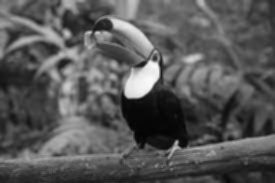

In [ ]:
# blur the image using (3,3) kernel
img_blur = cv2.blur(gray,(3,3),cv2.BORDER_DEFAULT)
cv2_imshow(img_blur)

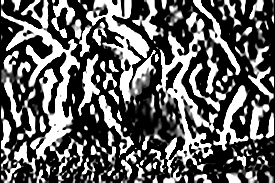

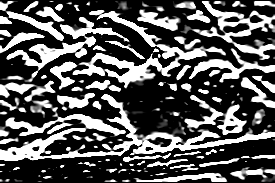

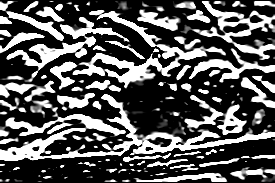

In [ ]:
# Sobel Edge Detection
# Use sobel Edge detection on X, Y and XY axis
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis # Sobel Edge Detection on the X axis
sobely =cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis # Sobel Edge Detection on the Y axis
sobelxy =cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis # Combined X and Y Sobel Edge Detection
 
# Display Sobel Edge Detection Images
cv2_imshow(sobelx)
cv2_imshow(sobely)
cv2_imshow(sobelxy)


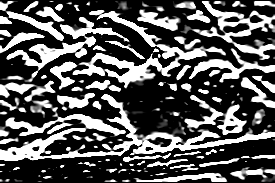

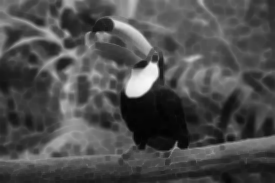

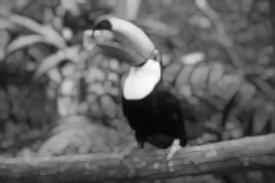

In [ ]:
import numpy as np
# Create a simple kernel, 3,3 numpy array of all ones, specify the type to be unsigned int 8
kernel = np.ones((3,3), np.uint8)   
 
# Apply dilation and erosion to the image (dilation goes first),
#here you can find the description of usage of two opecv methods for dilation and erosion


# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.

# You can set the iterations to 1

img_dilation = cv2.dilate(img_blur, kernel, iterations=1)
img_erosion = cv2.erode(img_blur, kernel, iterations=1)
cv2_imshow(sobelxy)
cv2_imshow(img_erosion)
cv2_imshow(img_dilation)

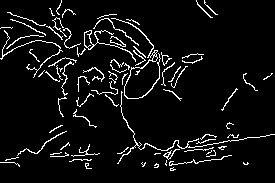

In [ ]:
# Usecanny algorithm for edge detection
# Try to play with different thresholds

# Canny Edge Detection
edges = cv2.Canny(img_blur,100,200)
# Display Canny Edge Detection Image
cv2_imshow(edges)

# Color histograms

In image processing and photography, a **color histogram** is a representation of the *distribution of colors* in an image. For digital images, a color histogram represents the number of pixels that have colors in each of a fixed list of color ranges, that span the image's color space, the set of all possible colors.

In [ ]:
img = cv2.imread("/content/mountain.png")

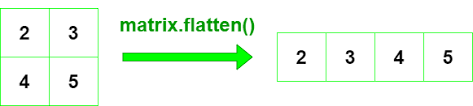

In [ ]:
# flatten the image so it will be a 2D array, (an arrray of pixels)
image_flattened = img.reshape(-1,3)
image_flattened

array([[73, 68, 69],
       [72, 62, 62],
       [84, 78, 79],
       ...,
       [42, 84, 97],
       [42, 85, 94],
       [40, 87, 95]], dtype=uint8)

In [ ]:
# use the flattened image to create a DataFrame, set column names to ["b", "g", "r"]
import pandas as pd
df = pd.DataFrame(image_flattened, columns=["b", "g", "r"])
df.head()

,b,g,r
0,73,68,69
1,72,62,62
2,84,78,79
3,92,88,83
4,80,72,65


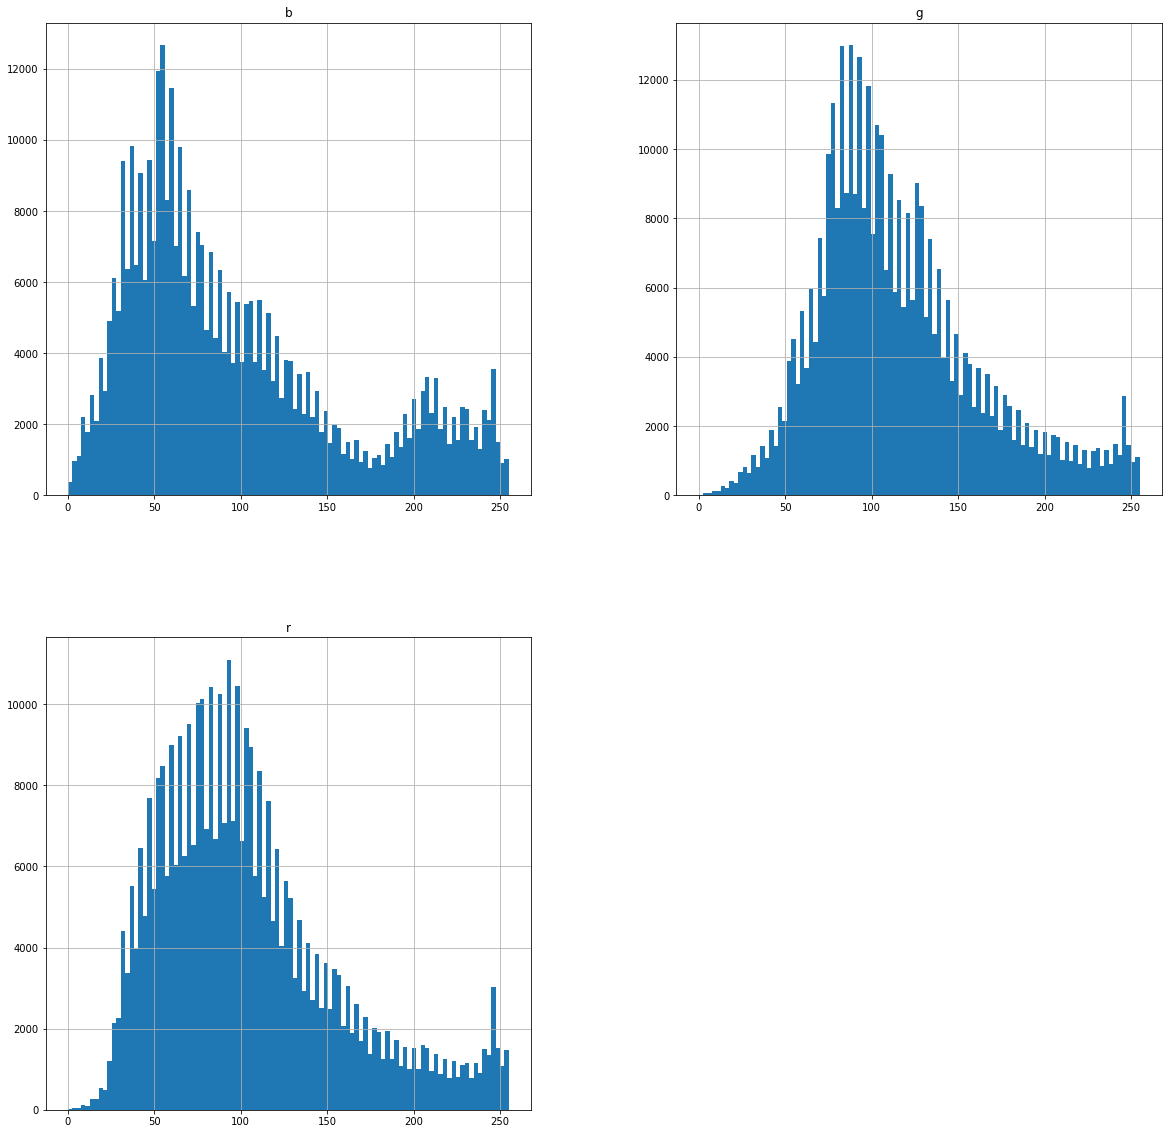

In [ ]:
import matplotlib.pyplot as plt
# display the histograms for each column, use pandas method to do that, use 100 bins and figsize = (20,10)
df.hist(bins=100,figsize=(20,20))
plt.show()

## Equalizing the image histogram

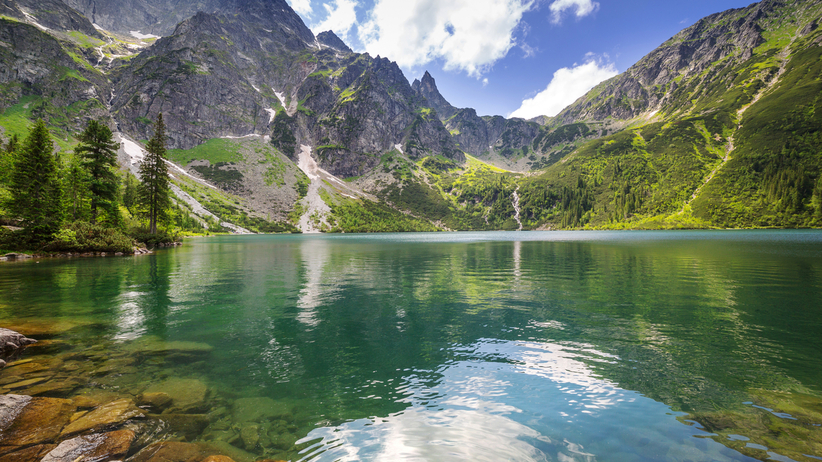

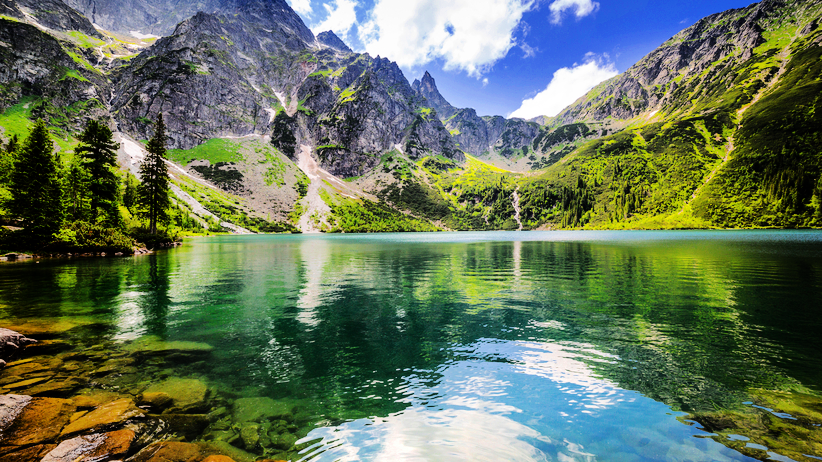

In [ ]:
# Convert the image to hsv fcolor format
hsv =  cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# split the hsv image using opencv function in H, S, V channels
h, s, v = cv2.split(hsv)

# equalize the saturation and value channels, leave hue as it is
equalized_s = cv2.equalizeHist(s)
equalized_v = cv2.equalizeHist(v)

# combine three channels to restore the 3 channel image using opencv function
equalized_image = cv2.merge([h, equalized_s, equalized_v])

# go back to BGR color palette
equalized_image_bgr = cv2.cvtColor(equalized_image, cv2.COLOR_HSV2BGR)

# display both original image and the equalized image
cv2_imshow(img)
cv2_imshow(equalized_image_bgr)

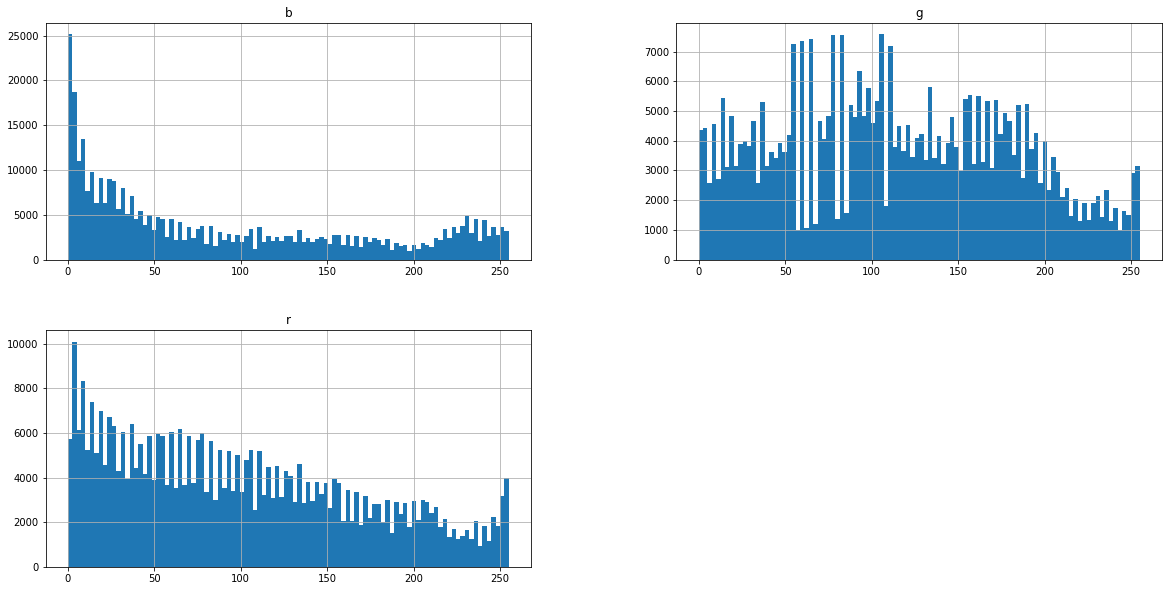

In [ ]:
# show the histograms after equalization

image_flattened = equalized_image_bgr.reshape(-1,3)
df = pd.DataFrame(image_flattened, columns = ["b", "g", "r"])
df.hist(bins=100, figsize=(20,10))
plt.show()